Part 2 will be the actual machine learning modelling

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import random

In [9]:
# read the preprocessed file
df1=pd.read_csv('new-financial-data.csv')

In [14]:
## Data Preparation
entry_id=df1['entry_id']
df1=df1.drop(columns='entry_id')

In [20]:
# One Hot Encoding
df1=pd.get_dummies(df1)     # Transform object into numeric by separate each object values as a column.
#df1=df1.drop(columns = ['housing_na', 'zodiac_sign_na', 'payment_type_na'])  # drop na columns

In [23]:
# Call train_test_split to create train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1.drop(columns=['e_signed']),    # X values
                                                    df1['e_signed'],                   # y values
                                                    test_size = 0.2,                   # percentage for test
                                                    random_state=0)                    # randam seed


In [27]:
## Balancing the training set
## Need a more balance +/- eg same number of positive and negative 
pos_index = y_train[y_train.values==1].index # get the index of all positive value
neg_index = y_train[y_train.values==0].index # get the index of all positive value

if len(pos_index) > len(neg_index):  # determine which has more entries
    higher = pos_index
    lower  = neg_index
else:
    higher = neg_index
    lower  = pos_index

random.seed(0)

# This will generate random number of entries
higher = np.random.choice(higher, size=len(lower))  
lower  = np.asarray(lower)        # to make lower the same array as higher
new_indexes = np.concatenate((higher,lower))

X_train = X_train.loc[new_indexes,]
y_train = y_train.loc[new_indexes,]

---
Normalize the data for better fitting


In [30]:
## Feature scaling (normalization)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2  = pd.DataFrame(sc_X.fit_transform(X_test))
## Add columns for train2 and test2
X_train2.columns = X_train.columns.values
X_test2.columns  = X_test.columns.values

X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

X_train = X_train2
X_test  = X_test2

---
Fitting a model - Using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)  # create a logistic Regression Model
classifier.fit(X_train, y_train)               # fit the model with train data


y_pred=classifier.predict(X_test)              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [34]:
print('cm=',cm) 
print('accuracy score=', accuracy)
print('f1 score=', f1)
print('precision score=', precision)
print('recall score=', recall)

cm= [[ 952  702]
 [ 868 1060]]
accuracy score= 0.5616973757677275
f1 score= 0.5745257452574527
precision score= 0.601589103291714
recall score= 0.549792531120332


Test Data Accuracy: 0.5617


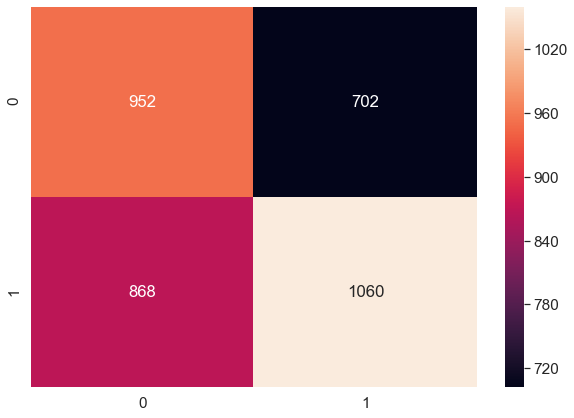

In [35]:
## create a heatmap 
df_cm=pd.DataFrame(cm, index=(0,1), columns =(0,1))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f"% accuracy_score(y_test,y_pred))

In [36]:
# cross validation 
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(),accuracies.std() * 2))

/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

Logistic Accuracy: 0.579 (+/- 0.019)


/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
# Analyzing Coefficients  = theta in the linear equation function?
# higher coef values meaning more weight on the overall evaluation of the result.
# eg purchases and purchases_partners


pd.concat([pd.DataFrame(X_train.columns, columns = ['features']),
           pd.DataFrame(np.transpose(classifier.coef_), columns=['coef'])],
           axis = 1)

,features,coef
0,age,-0.254333
1,home_owner,-0.062032
2,income,0.062022
3,current_address_year,-0.012088
4,has_debt,0.076205
5,amount_requested,0.091326
6,risk_score,0.221950
7,risk_score_2,-0.000070
8,risk_score_3,-0.116577
9,risk_score_4,-0.006210


In [39]:
## features Selection

from sklearn.feature_selection import RFE     # What is RFE?
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()  # Create a new classifier?
rfe = RFE(classifier, 10)          # Will use 20 columns
rfe = rfe.fit(X_train, y_train)

/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jameskw@us.ibm.com/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logisti

In [40]:
pd.concat([pd.DataFrame(X_train.columns, columns = ['features']),
           pd.DataFrame(np.transpose(rfe.support_), columns=['support'])],
           axis = 1)
X_train.columns[rfe.support_]

Index(['age', 'home_owner', 'income', 'has_debt', 'amount_requested',
       'risk_score', 'risk_score_3', 'ext_quality_score', 'personal_account_t',
       'pay_schedule_semi-monthly'],
      dtype='object')

---
We can continue witht the sub columns but 

In [41]:
#print("df1.head() : \n",df1.head())
#print("df1.info()",df1.info())
#print("df1.describe()\n",df1.describe())
#df1.dtypes==object
#print("df1.columns : \n",df1.columns)
#print("df1.columns type: \n",df1.dtypes)

print(X_train[:5])
#print(X_train.shape)
#print(y_train.shape)

#print(X_test.shape)
#print(y_test.shape)

#print(y_train.value_counts())
#print(y_test.value_counts())

#print(X_test.head())
#print(y_train.head())
#print(y_test.head())

            age  home_owner    income  current_address_year  has_debt  \
11713  0.244208    1.150079 -1.174031             -0.574487  0.509431   
13230 -1.265977   -0.869505  0.000723              0.520049  0.509431   
12493 -1.014279    1.150079 -1.329562              2.344276  0.509431   
10329 -1.685473   -0.869505 -1.250142             -0.209641  0.509431   
9845   0.160309   -0.869505 -0.465869             -0.939332  0.509431   

       amount_requested  risk_score  risk_score_2  risk_score_3  risk_score_4  \
11713         -0.063680   -0.445233     -0.937077     -2.219817      0.669471   
13230         -0.491090    0.114655     -0.066601      0.069224     -0.071094   
12493         -0.419855    0.980229     -0.488352      0.070042     -1.810397   
10329         -0.206150   -0.129894     -0.831305     -0.626445     -0.203298   
9845          -0.704795   -1.796688     -0.398186      0.253672      0.385388   

       risk_score_5  ext_quality_score  ext_quality_score_2  \
11713     -

---
Since the result of the logistic is not very good, lets try another fitting model.


In [ ]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression(random_state=0)  # create a logistic Regression Model
classifier.fit(X_train, y_train)               # fit the model with train data


y_pred=classifier.predict(X_test)              # Use Test data to create a predicated data

# To evaluate the results

from sklearn.metrics import confusion_matrix, accuracy_score,f1_score, \
                            precision_score,recall_score

cm=confusion_matrix(y_test,y_pred)          # confusion matrix
accuracy = accuracy_score(y_test,y_pred)    # Accuracy score
f1 = f1_score(y_test,y_pred)                # F1 score is similar to accuracy score
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)


In [42]:
from sklearn.neural_network import ML

In [43]:
reg=Ridge(alpha=0.5)
reg.fit(X_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [48]:
reg.predict(X_test)


array([0.61737993, 0.58198776, 0.62974948, ..., 0.46998921, 0.5646945 ,
       0.5205735 ])

In [51]:
reg.score(X_test, y_test)

0.016692736976650635